# Task 3: To Explore Unsupervised Machine Learning
### Business Requirement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing and Understanding the Data
### 1.1 Reading DataSet

In [2]:
iris = pd.read_csv("Iris.csv")

### 1.2 Explore the DataSet

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.set_index('Id', inplace=True)

In [25]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [22]:
iris.shape

(150, 5)

So, we can see that the size of the dataset is (150, 6) which means we have 150 rows of data and 6 columns. These columns are Sepal Length, Sepal Width, Petal Length, Petal Width and Species. And also we don't have any null values in the dataset.

In [23]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Domain of all the attributes belong to the same scale

## 2. Let's visualize the dataset

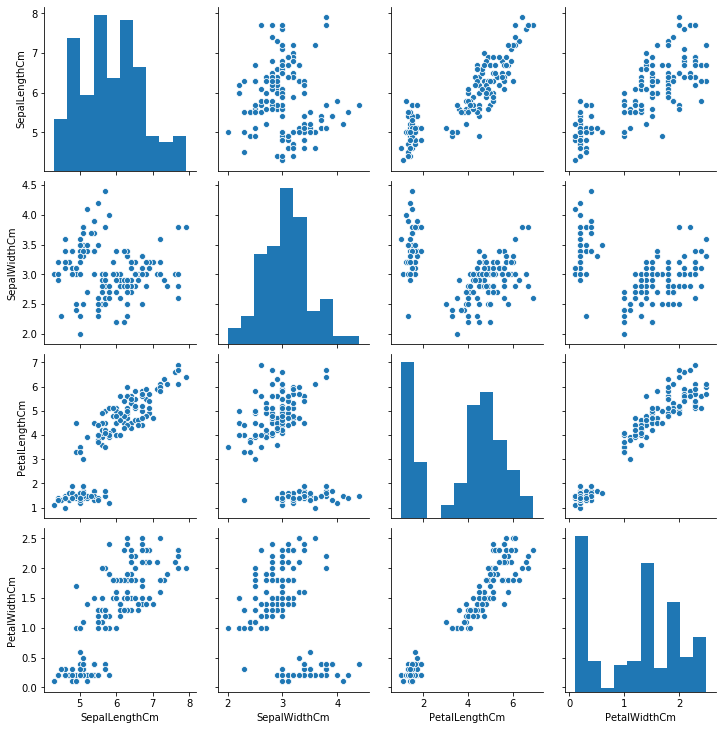

In [27]:
sns.pairplot(iris[1:])

In the first look we can see that their exist 2 to 3 clusters in the DataSet

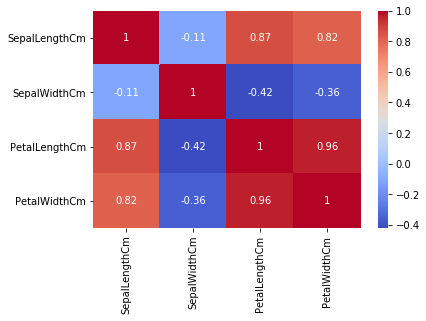

In [31]:
sns.heatmap(iris.corr(), cmap = 'coolwarm', annot=True)

## 3. Finding the Optimal Number of Clusters

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
X = iris.iloc[:, :-1]

In [34]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Elbow Curve Method

Text(0, 0.5, 'ssd')

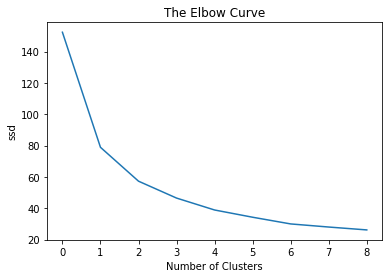

In [49]:
ssd = []
range_n_clusters = range(2,11)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.title("The Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("ssd")

### Silhouette Analysis

In [50]:
range_n_clusters = range(2,11)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4978256901095472
For n_clusters=5, the silhouette score is 0.4885175508886279
For n_clusters=6, the silhouette score is 0.36820569682713084
For n_clusters=7, the silhouette score is 0.35970333833111445
For n_clusters=8, the silhouette score is 0.35537845088992714
For n_clusters=9, the silhouette score is 0.33695360883809805
For n_clusters=10, the silhouette score is 0.3183078047872872


After visualizing the Elbow curve and performing Silhouette Analysis we find that 3 is the most optimal number of clusters because after that silhouette score doesn't decreases very significantly

## 4. Building a Clustering Model

In [51]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [53]:
len(kmeans.labels_)

150

In [54]:
iris['Predicted_Cluster'] = kmeans.labels_
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


## Visualization of Predicted Clusters

Text(0, 0.5, 'Sepal Width')

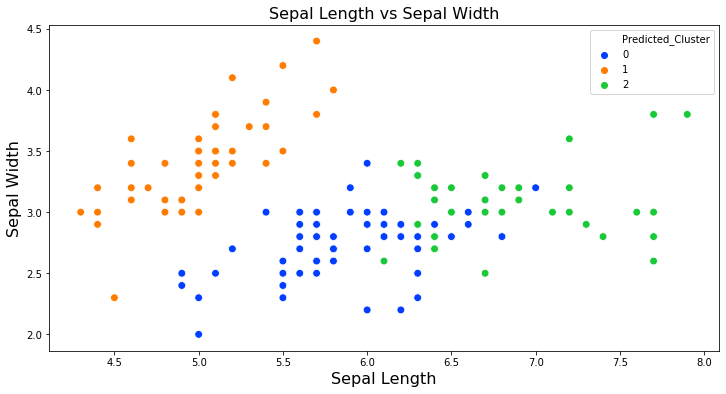

In [85]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = iris.iloc[:,0], y = iris.iloc[:, 1], hue = iris.iloc[:, 5], palette='bright', s= 60)
plt.title("Sepal Length vs Sepal Width", fontsize = 16)
plt.xlabel("Sepal Length", fontsize = 16)
plt.ylabel("Sepal Width", fontsize = 16)

Text(0, 0.5, 'Petal Width')

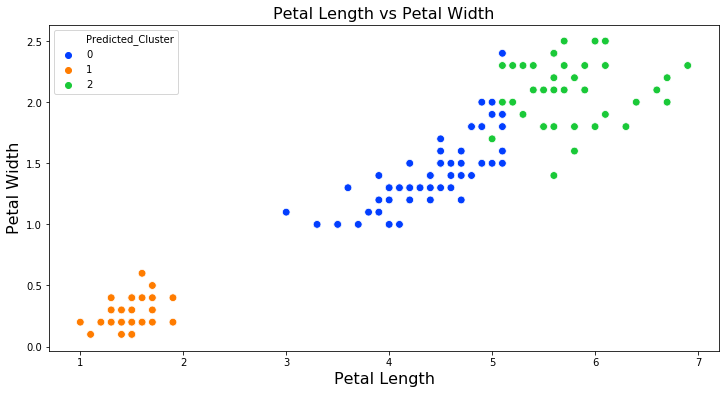

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = iris.iloc[:,2], y = iris.iloc[:, 3], hue = iris.iloc[:, 5], palette='bright', s= 60)
plt.title("Petal Length vs Petal Width", fontsize = 16)
plt.xlabel("Petal Length", fontsize = 16)
plt.ylabel("Petal Width", fontsize = 16)